discount and pricing leakage

importing lib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

load cleaned dataset

In [ ]:
df = pd.read_csv("profit_leakage_cleaned.csv")
df.head()

,order_id,order_date,customer_id,customer_type,region,sales_channel,product_id,product_category,unit_cost,unit_price,...,refund_amount,inventory_level,reorder_level,holding_cost,payment_delay_days,outstanding_amount,supplier_delay_days,logistics_cost,operational_cost,profit_margin_percent
0,1,2022-01-01 00:00:00,16795,Retail,North,Distributor,435,Automobile,4829.88,888.93,...,0.0,483,189,33.15,18,0.000000,24,659.09,78.99,-455.20
1,2,2022-01-01 00:01:00,1860,Corporate,North,Distributor,235,Pharma,3173.46,4089.16,...,0.0,11,182,208.42,10,0.000000,29,871.93,278.40,-0.05
2,3,2022-01-01 00:02:00,39158,Wholesale,East,Online,729,Electronics,3498.54,3923.52,...,0.0,260,183,346.40,69,71721.553248,11,946.05,1743.35,7.04
3,4,2022-01-01 00:03:00,45732,Retail,South,Distributor,1939,Furniture,628.06,851.16,...,0.0,202,53,43.85,41,4085.993580,17,833.95,716.21,22.22
4,5,2022-01-01 00:04:00,12284,Retail,North,Online,1670,Pharma,1257.04,3229.26,...,0.0,152,185,19.90,21,0.000000,25,540.11,1732.09,32.47


discount overview

In [ ]:
df["discount_percent"].describe()

count    100000.000000
mean         20.017497
std          11.562335
min           0.000000
25%           9.980000
50%          20.040000
75%          30.050000
max          40.000000
Name: discount_percent, dtype: float64

discount distribution

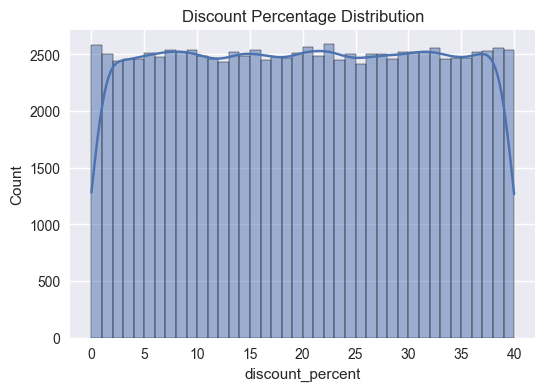

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["discount_percent"], bins=40, kde=True)
plt.title("Discount Percentage Distribution")
plt.show()

discount vs profit

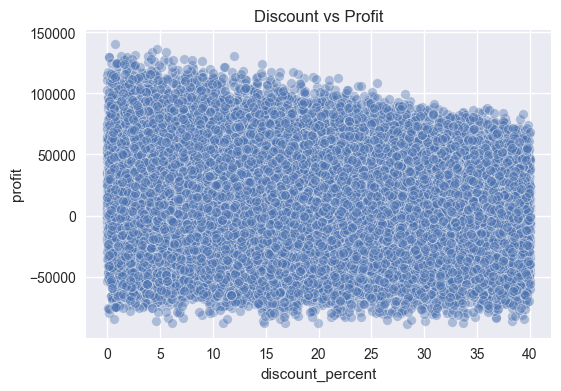

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="discount_percent",
    y="profit",
    data=df,
    alpha=0.4
)
plt.title("Discount vs Profit")
plt.show()

standardization

In [7]:
df["discount_zscore"] = (
    df["discount_percent"] - df["discount_percent"].mean()
) / df["discount_percent"].std()


extreme discount orders

In [8]:
extreme_discounts = df[df["discount_zscore"].abs() > 2]
extreme_discounts.shape


(0, 29)

box plot discount leakage

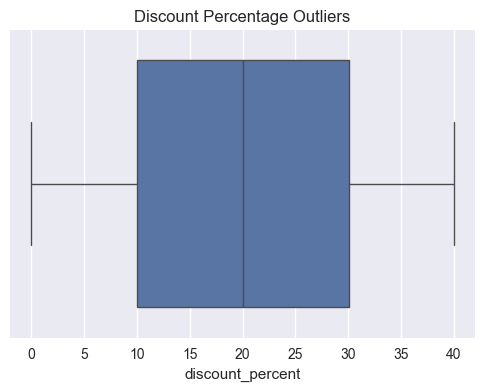

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["discount_percent"])
plt.title("Discount Percentage Outliers")
plt.show()


category wise avg discount

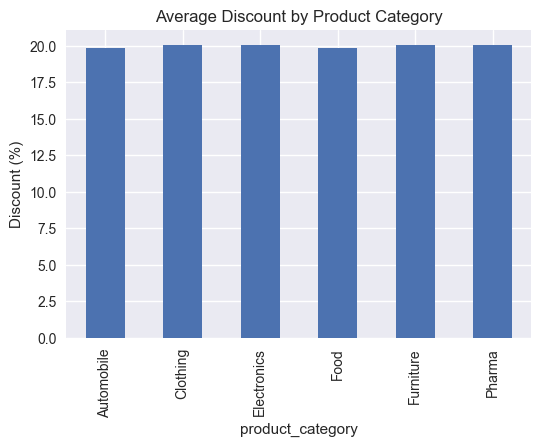

In [10]:
plt.figure(figsize=(6,4))
df.groupby("product_category")["discount_percent"].mean().plot(kind="bar")
plt.title("Average Discount by Product Category")
plt.ylabel("Discount (%)")
plt.show()
